# Set-up

### Imports

In [49]:
# --- Data handling and visualization ---
import pandas as pd  # Dataframe tools
from tabulate import tabulate  # Pretty printing for dataframes

import seaborn as sns  # Easier plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

### Globals

In [50]:
# --- Visualization ---
rc_dict = {
  "savefig.dpi": 900,  # Saved figure dots-per-inch. 600 is "HD"
  "savefig.facecolor": "white",  # This, combined with transparent setting, keeps saved figs from looking like trash on dark backgrounds 
  "savefig.transparent": False,
  "figure.figsize": (14, 10),  # Default (width, height) of figure
}
plt.rcParams.update(rc_dict)

## Data preprocessing

In [51]:
_spectrals = [
    pd.read_parquet("../results/dataframes/dataframe_EMB_ex06v2.0-gamma_DK_20220929.parquet"),
    pd.read_parquet("../results/dataframes/dataframe_EMB_ex06v2.0-mu_DK_20220929.parquet"),
    pd.read_parquet("../results/dataframes/dataframe-merged_EMB_ex06_DK_20220928.parquet")
]

df_spectral = pd.concat(_spectrals)

df_spectral.index = range(len(df_spectral))
df_spectral = df_spectral.astype({
    'N': 'int32',
    'avgk': 'category',
    'rep': 'category',
    'mu': 'float32',
    'gamma': 'float32',
    'tau': 'float32',
    'pfi': 'float32',
    'metric': 'category',
})

df_spectral.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   N         5061 non-null   int32   
 1   avgk      5061 non-null   category
 2   mu        5061 non-null   float32 
 3   gamma     5061 non-null   float32 
 4   tau       5061 non-null   float32 
 5   rep       5061 non-null   category
 6   pfi       5061 non-null   float32 
 7   metric    5061 non-null   category
 8   AUROC     5061 non-null   float64 
 9   Accuracy  5061 non-null   float64 
dtypes: category(3), float32(4), float64(2), int32(1)
memory usage: 193.8 KB


# Figures

<Figure size 1400x1000 with 0 Axes>

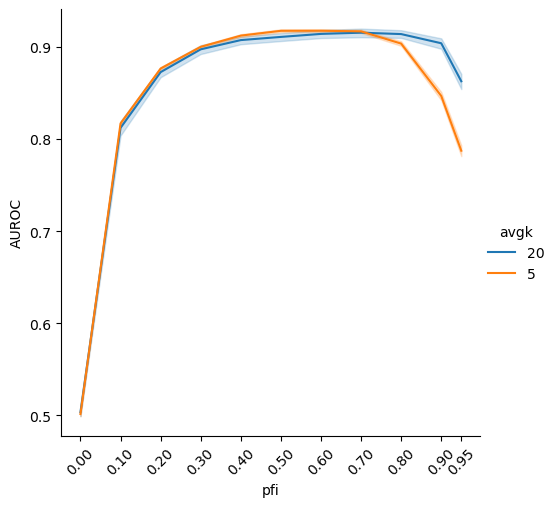

In [52]:
_xticks = sorted(list(set(df_spectral["pfi"])))

plt.figure()
sns.relplot(
    data=df_spectral, kind="line",
    x="pfi", y="AUROC",
    hue="avgk",
    # style="metric"
)

plt.xticks(_xticks, rotation=45)

plt.savefig("../results/plots/line_auroc-pfi-avgk_EMB_ex04-ex06-avgk=20_DK_20220929.png")

<Figure size 1400x1000 with 0 Axes>

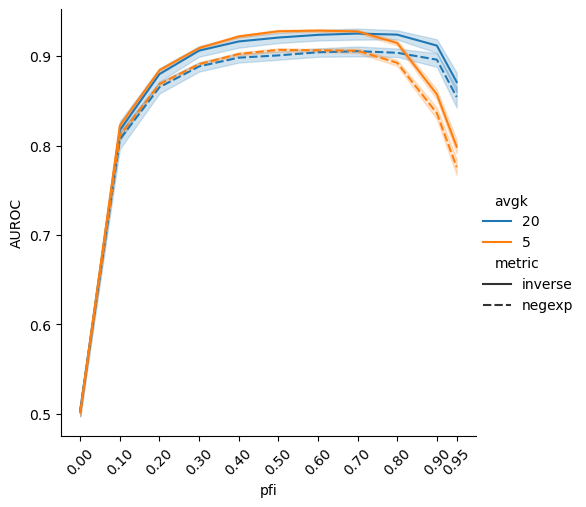

In [53]:
_xticks = sorted(list(set(df_spectral["pfi"])))

plt.figure()
sns.relplot(
    data=df_spectral, kind="line",
    x="pfi", y="AUROC",
    hue="avgk",
    style="metric"
)

plt.xticks(_xticks, rotation=45)

plt.savefig("../results/plots/line_auroc-pfi-avgk-metric_EMB_ex04-ex06-avgk=20_DK_20220929.png")

<Figure size 1400x1000 with 0 Axes>

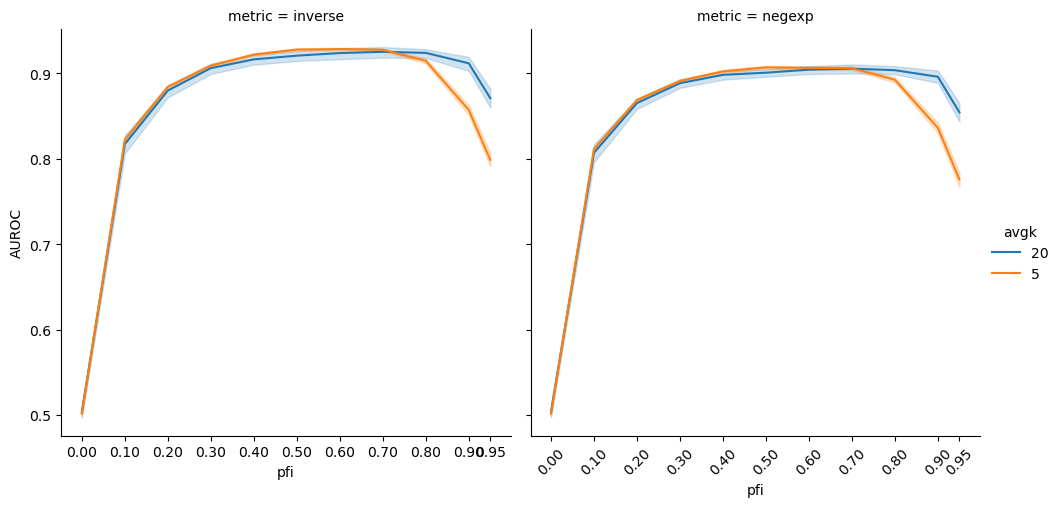

In [54]:
_xticks = sorted(list(set(df_spectral["pfi"])))

plt.figure()
sns.relplot(
    data=df_spectral, kind="line",
    x="pfi", y="AUROC",
    hue="avgk",
    col="metric"
)

plt.xticks(_xticks, rotation=45)

plt.savefig("../results/plots/faceted-line_auroc-pfi-avgk-metric_EMB_ex04-ex06-avgk=20_DK_20220929.png")

([<matplotlib.axis.XTick at 0x7f44c1f68760>,
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1400x1000 with 0 Axes>

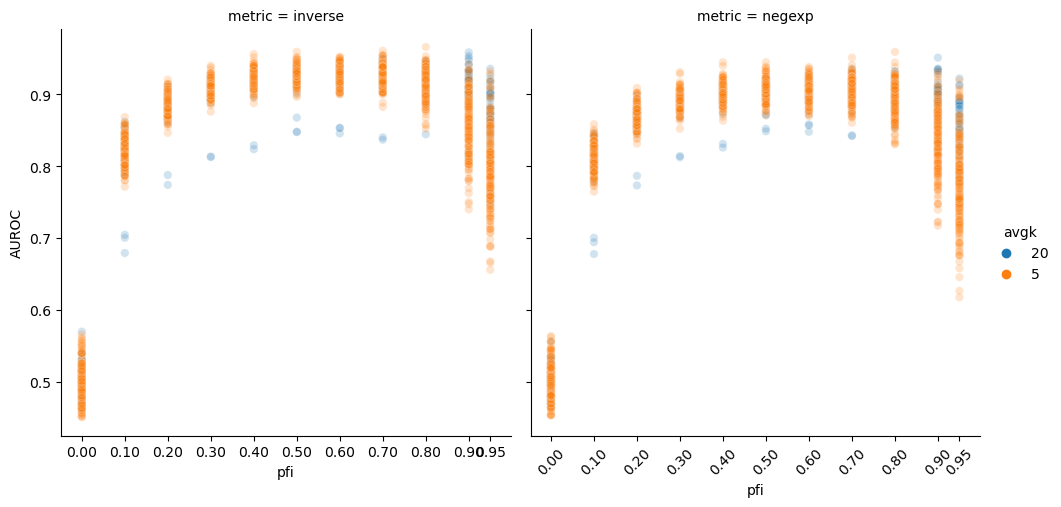

In [55]:
_xticks = sorted(list(set(df_spectral["pfi"])))

plt.figure()
sns.relplot(
    data=df_spectral, kind="scatter",
    x="pfi", y="AUROC",
    hue="avgk",
    col="metric",
    alpha=0.2
)

plt.xticks(_xticks, rotation=45)